In [41]:
#SMS SPAM  CLASSIFIER


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pickle
from wordcloud import WordCloud,ImageColorGenerator


In [43]:
messages= pd.read_csv('/content/sample_data/SMS_data', sep='\t', names=['label', 'message'])


In [44]:
messages


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


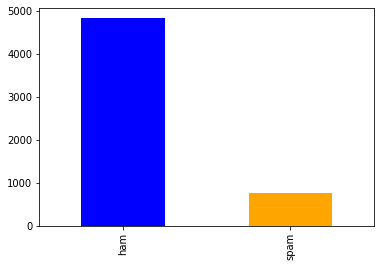

In [45]:
count_Class= pd.value_counts(messages['label'],sort=True)
count_Class.plot(kind='bar', color=['blue', 'orange'])




In [46]:
#DATA CLEANING AND PREPROCESSING using LEMMATIZER


In [47]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer    #also can use stemming
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [48]:
lm= WordNetLemmatizer()
data= []
for i in range (0, len(messages)):
  data_review= re.sub('[^a-zA-Z]',' ', messages['message'][i])
  data_review = data_review.lower()
  data_review= data_review.split()
  data_review= [lm.lemmatize(word) for word in data_review if not word in stopwords.words('english')]
  data_review =" ".join(data_review)
  data.append(data_review)

In [49]:
ham_data = messages.loc[messages['label']=='ham']
ham_data= ham_data.drop(['label'],axis=1)
spam_data = messages.loc[messages['label']=='spam']
spam_data= spam_data.drop(['label'],axis=1)


In [50]:
#data


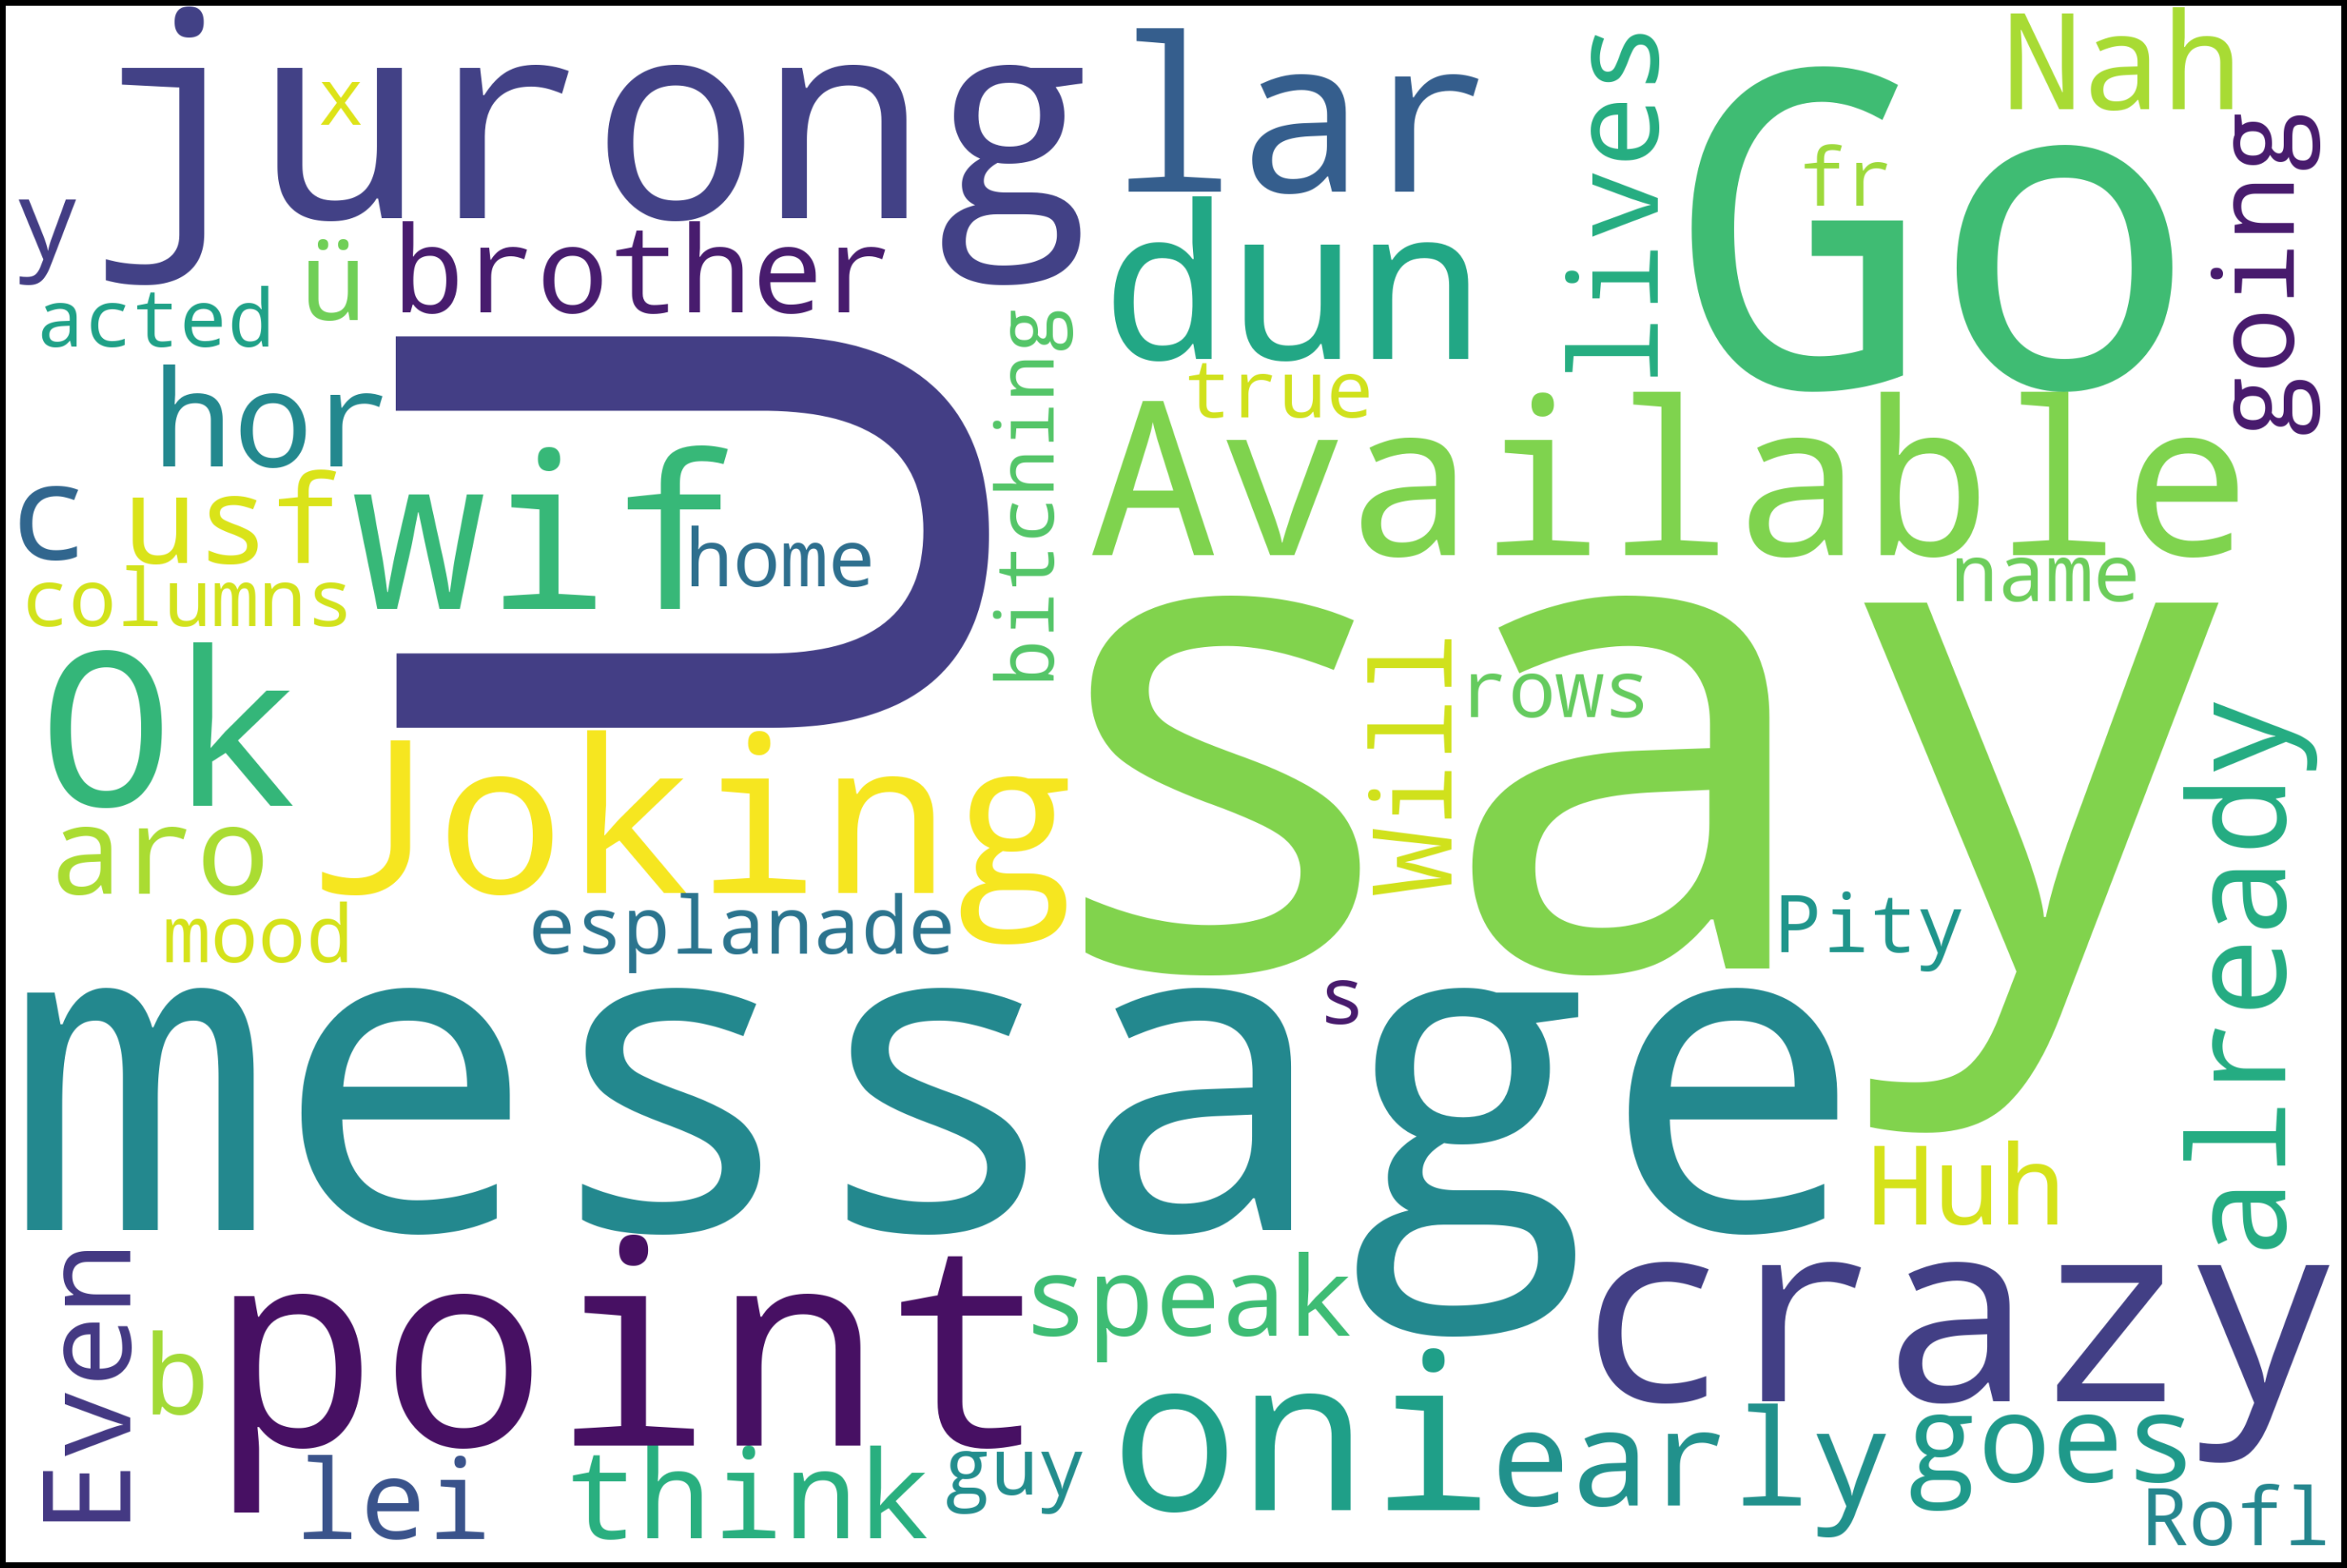

In [51]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text= ham_data
wordcloud= WordCloud(
    width= 3000,
    height= 2000,
    background_color= 'white',
    stopwords= STOPWORDS).generate(str(text))
fig= plt.figure(
    figsize =(40, 30),
    facecolor='k',
    edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()






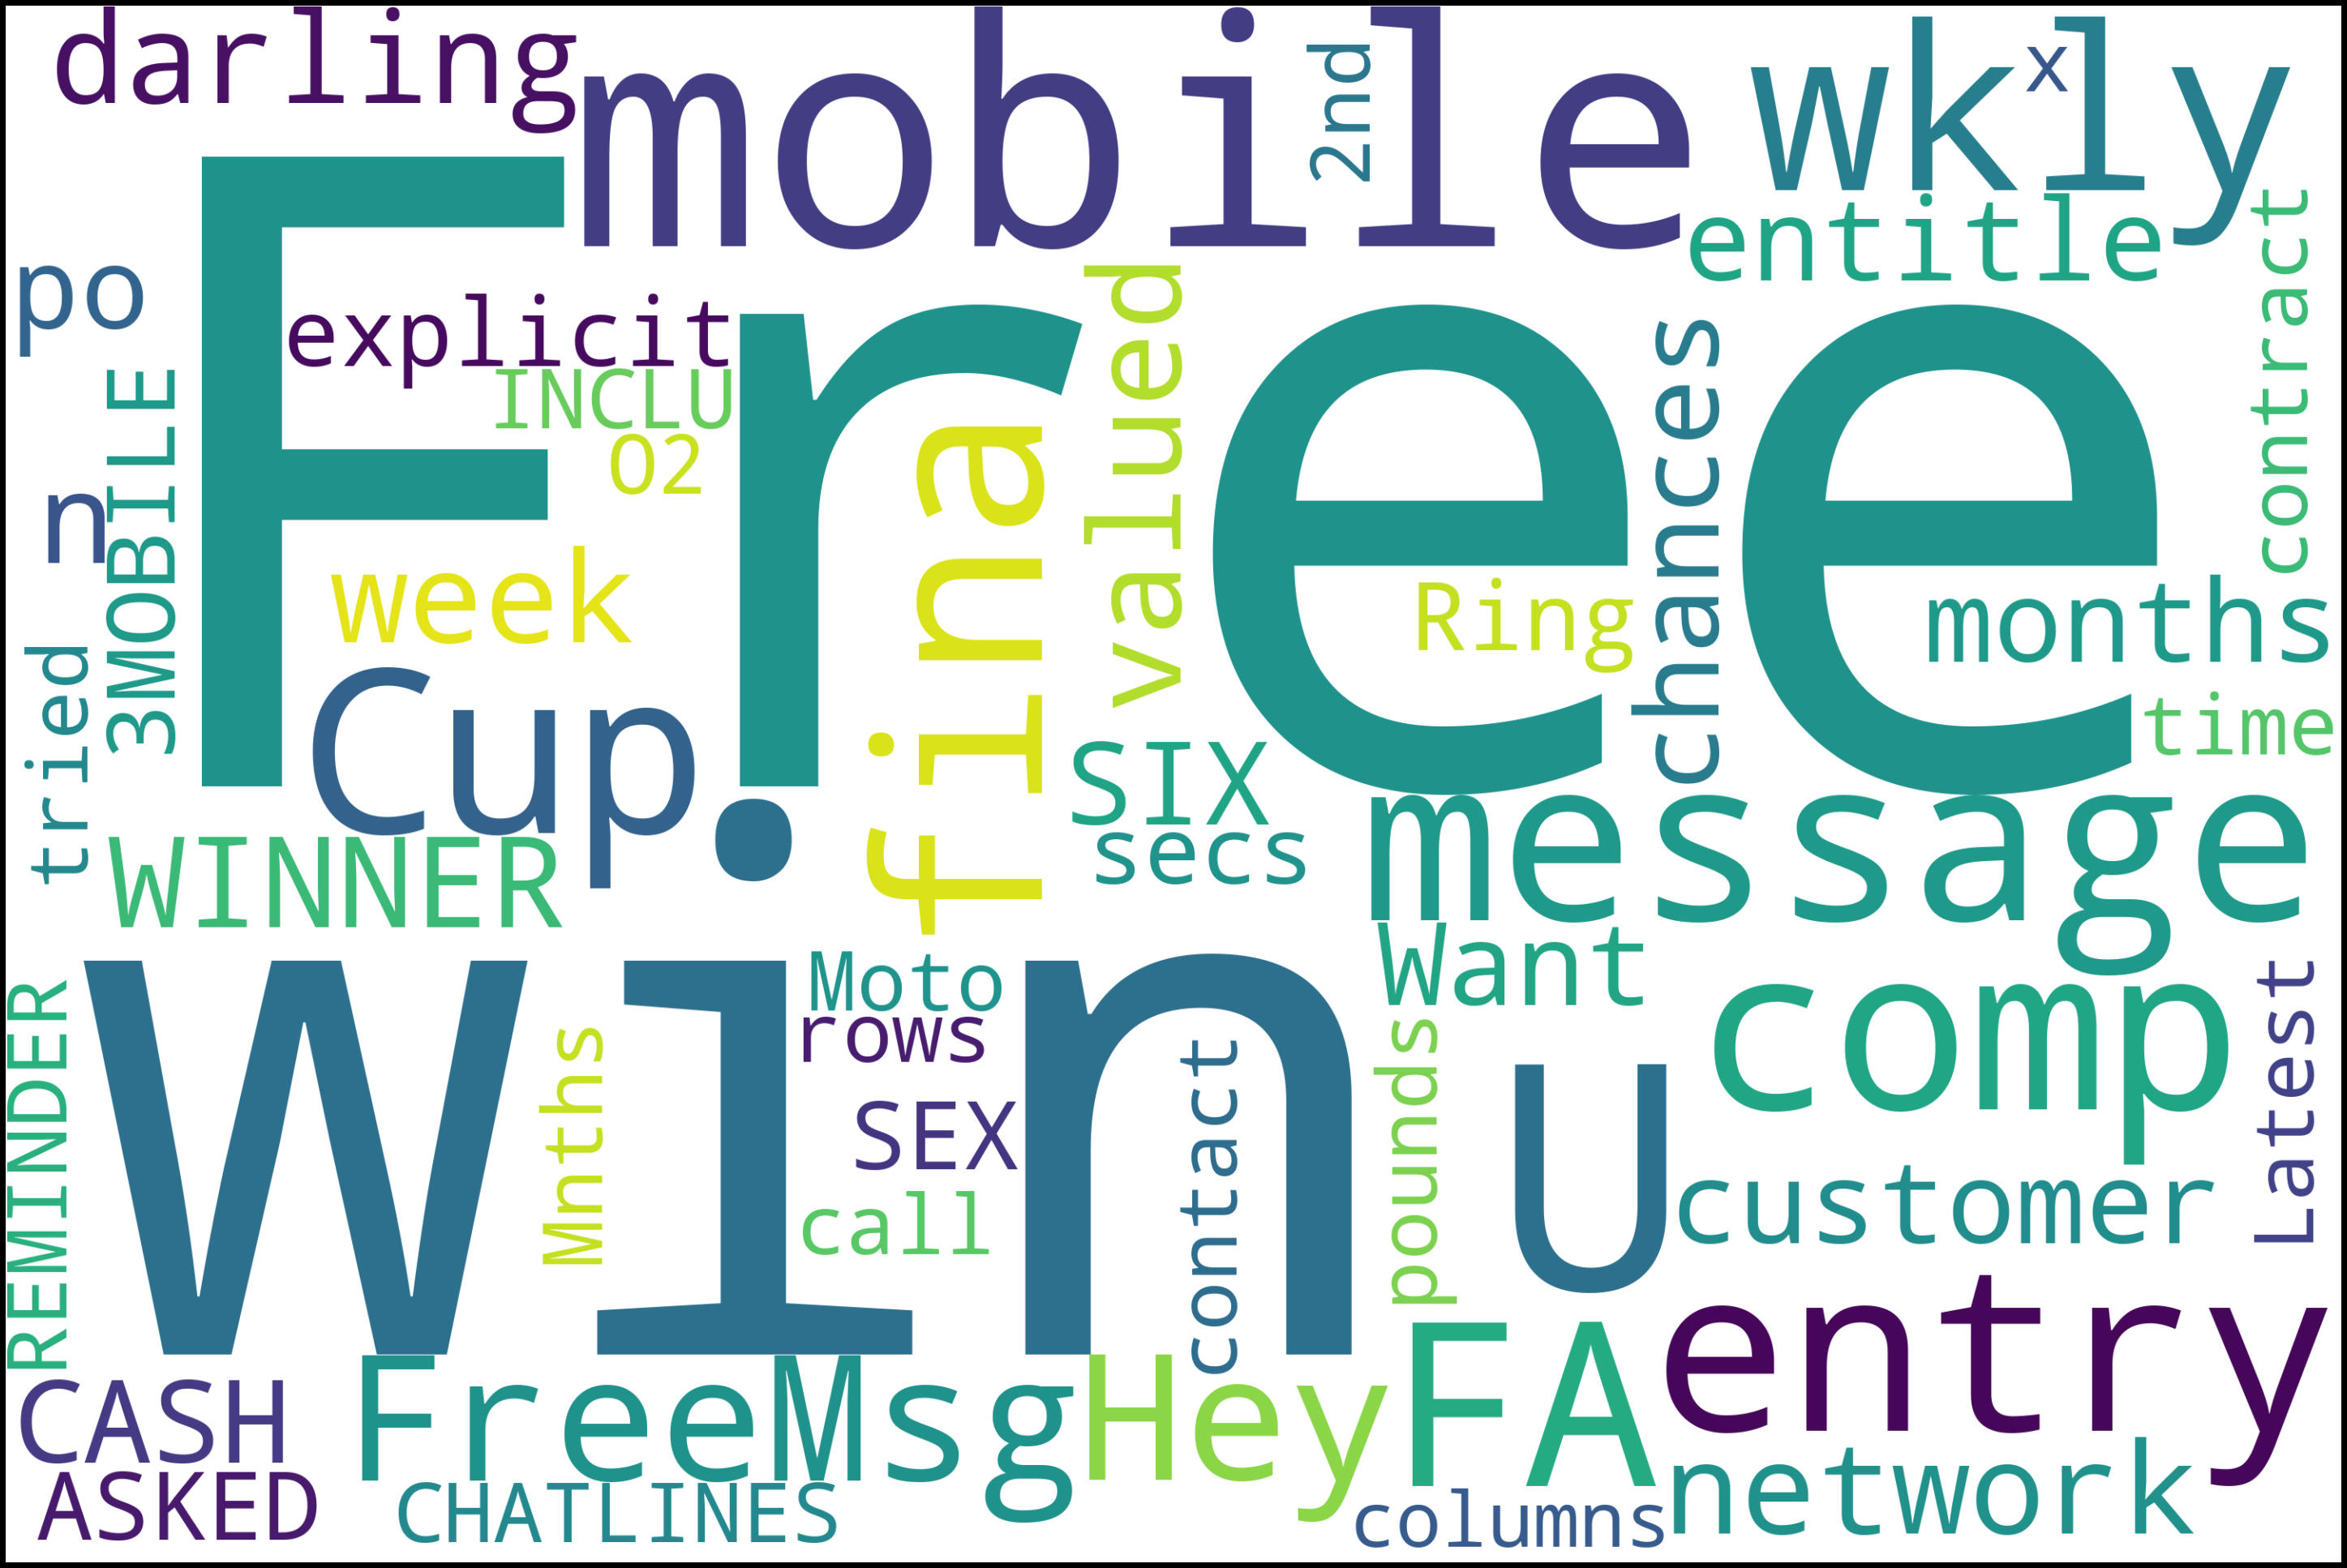

In [52]:
text= spam_data
wordcloud= WordCloud(
    width= 3000,
    height= 2000,
    background_color= 'white',
    stopwords= STOPWORDS).generate(str(text))
fig= plt.figure(
    figsize =(40, 30),
    facecolor='k',
    edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [53]:
#CREATING BAG OF WORDS
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=3000)
x= cv.fit_transform(data)
pickle.dump(cv, open("cv.pickle","wb"))

In [54]:
#ALTERNATE OF BAG PF WORDS WE CAN USE TF-IDF
# from sklearn.feature_extraction.text import Tfidfvectorizer
# vector= Tfidfvectorizer(max_features=4000)
# x=vector.fit_transform(data).toarray()


In [55]:
y=pd.get_dummies(messages['label'])
y= y.iloc[:,1]
b= y.tolist()
b.count(1)


747

In [65]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train, x__test, y_train, y_test= train_test_split(x,y,test_size=0.20, random_state=5)
x_train.shape

(4457, 3000)

In [57]:
from sklearn.model_selection import cross_val_score


In [58]:
from sklearn.naive_bayes import MultinomialNB
mulNB= MultinomialNB(alpha=3.0)
score= cross_val_score(mulNB,x,y,cv=5,scoring='accuracy').mean()
score


0.9816945359106681

In [70]:
from sklearn.svm import SVC
svc= SVC()
score= cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean()
score

0.9777459323248342

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=4)
score= cross_val_score(knn,x,y,cv=5,scoring='accuracy').mean()
score

0.9224691854988688

In [ ]:
GridSearchCV,
#HYPERPARAMETER SELECTION
from sklearn.model_selection import GridSearchCV
parameter =[{'alpha':[0.0,1.0,2.0,3.0,4.0], 'fit_prior':['True'], 'class_prior':[None]}]
grid_search= GridSearchCV(estimator=mulNB,param_grid=parameter, scoring='accuracy', cv=5).fit(x_train,y_train)

In [67]:
grid_search.best_params_


{'alpha': 3.0, 'class_prior': None, 'fit_prior': 'True'}

In [72]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model= MultinomialNB(alpha=3.0).fit(x_train, y_train)


In [76]:
spam_detect_model.score(x, y)

0.9867193108399138

PIPELINE STEPS
---

1. problkem
2. data
3. data cleaning and preprocessing
4. feature selection- analysis
5. split into traiing and testing
6. model selecton
7. hyper p[arameter selectn
8. traiing
9. testing
10. evaluation
....












testing baki xa

